# Convolutional Layers

> Compassion is a verb.
>
> – Thich Nhat Hanh

Today we will have a first look convolutional layers. Convolutional Neural Networks were first introduced in the 1980s by *Yann LeCun* and have been at the heart of most image related AI development ever since. While the latest research might change this

[An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://openreview.net/forum?id=YicbFdNTTy) 
  
I am sure the power of convolutions will remain a powerful techinque for any AI image wizards for quite some time.

A nice concise introduction of convolutional layers can be found on this excellent pyimagesearch blog by *Adrian Rosebrock*:

https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

For a more thorough explanation we refer to Chapter 14 of the Tensorflow bible:

[Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/&tag=jusdhaquo-20)

Here we just start playing around with this technique a little bit basically following the code from the get blog post *How to Visualize Filters and Feature Maps in Convolutional Neural Networks* by *Jason Brownlee* 

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/





## Getting ready

In [9]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16

image_path = './images/dance.jpg'

## Preprocessing the image

1. Loading the image file into PIL format (target size 224,224):  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img

2. Converting the PIL Image instance to a Numpy array:  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/img_to_array

3. Converting the single image into a batch. (Keras layers are expecting a batch as input.)

In [10]:
image_pil = tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224)) #(1)
image_np_array = tf.keras.preprocessing.image.img_to_array(image_pil) #(2)
image_np_array_batch = np.array([image_np_array]) #(3)

## The input image

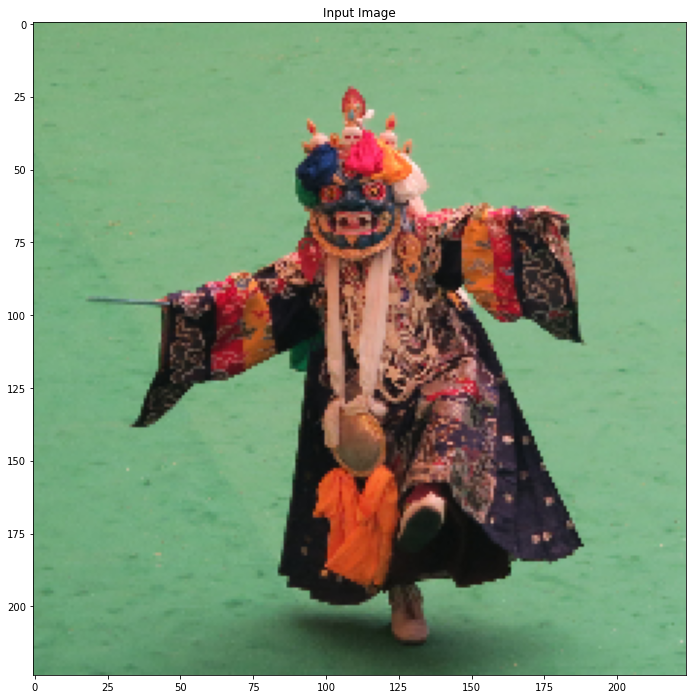

In [11]:
plt.figure(figsize=(12,12))
plt.title('Input Image')
plt.imshow(image_np_array/255.0)
plt.show()



## Loading the VGG16 Model

Next we will load the VGG16 model and print out summary information. 

In [12]:
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## A closer look at the convolutional layers

In [13]:

print("{:3s}:  {:12s}:   {:18s} {}\n".format('pos','layer name','filter shape','output shape'))

for i,layer in enumerate(model.layers):
    if 'conv' in layer.name:
        filters, biases = layer.get_weights()
        print("{:3d}:  {:12s}    {:18s} {} ".format(i,layer.name, str(filters.shape),str(layer.output.shape)))

pos:  layer name  :   filter shape       output shape

  1:  block1_conv1    (3, 3, 3, 64)      (None, 224, 224, 64) 
  2:  block1_conv2    (3, 3, 64, 64)     (None, 224, 224, 64) 
  4:  block2_conv1    (3, 3, 64, 128)    (None, 112, 112, 128) 
  5:  block2_conv2    (3, 3, 128, 128)   (None, 112, 112, 128) 
  7:  block3_conv1    (3, 3, 128, 256)   (None, 56, 56, 256) 
  8:  block3_conv2    (3, 3, 256, 256)   (None, 56, 56, 256) 
  9:  block3_conv3    (3, 3, 256, 256)   (None, 56, 56, 256) 
 11:  block4_conv1    (3, 3, 256, 512)   (None, 28, 28, 512) 
 12:  block4_conv2    (3, 3, 512, 512)   (None, 28, 28, 512) 
 13:  block4_conv3    (3, 3, 512, 512)   (None, 28, 28, 512) 
 15:  block5_conv1    (3, 3, 512, 512)   (None, 14, 14, 512) 
 16:  block5_conv2    (3, 3, 512, 512)   (None, 14, 14, 512) 
 17:  block5_conv3    (3, 3, 512, 512)   (None, 14, 14, 512) 


## A sub model of VGG16 

Next we will define a submodel of VGG16 containing only the first convolutional layer

In [14]:
layer_one_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)
layer_one_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


## Visualizing feature maps 

Finally the fruit of our efforts, we apply the above defined submodel of VGG16 on our input image to see the 64 feature maps which are the output of the convolutional layer.

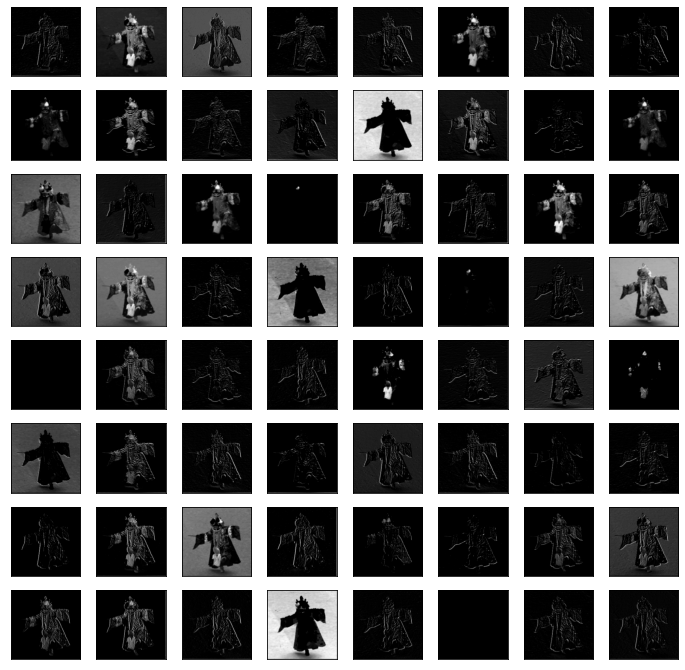

In [15]:
feature_maps = layer_one_model.predict(image_np_array_batch)

square = 8
ix = 1
plt.figure(figsize=(12,12))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()